In [1]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier
from imblearn.combine import SMOTEENN

In [3]:
cleaned_telecom_data = pd.read_csv('cleaned_teleco_data.csv')

In [4]:
cleaned_telecom_data.columns

Index(['Unnamed: 0', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'tenure_group'],
      dtype='object')

In [5]:
clonee = cleaned_telecom_data.copy()

In [6]:
#one hot encoding
clonee[['Month-to-month', 'One year', 'Two year']] = pd.get_dummies(clonee['Contract'])
clonee[['SrCitizen_no', 'SrCitizen_yes']] = pd.get_dummies(clonee['SeniorCitizen'])
clonee[['PhoneService_no', 'PhoneService_yes']] = pd.get_dummies(clonee['PhoneService'])
clonee[['DSL', 'Fiber optic', 'No']] = pd.get_dummies(clonee['InternetService'])
clonee[['OnlineSecurity_no', 'OnlineSecurity_yes', 'Nis']] = pd.get_dummies(clonee['OnlineSecurity'])
clonee[['OnlineBackup_no', 'OnlineBackup_yes', 'Nis_backup']] = pd.get_dummies(clonee['OnlineBackup'])
clonee[['DeviceProtection_no', 'DeviceProtection_yes', 'Nis_DeviceP']] = pd.get_dummies(clonee['DeviceProtection'])
clonee[['TechSupport_no', 'TechSupport_yes', 'Nis_TechS']] = pd.get_dummies(clonee['TechSupport'])
clonee[['matBank transfer (autoic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check']] = pd.get_dummies(clonee['PaymentMethod'])
# clonee[['MonthlyCharges']] = pd.get_dummies(clonee['MonthlyCharges'])

In [7]:
#code to convert the dependent variable(y) into a binary classification
le = preprocessing.LabelEncoder()
le.fit(clonee['Churn'])
clonee['Churnn'] = le.transform(clonee['Churn'])

In [8]:
clonee[['Churnn', 'Churn']]

,Churnn,Churn
0,0,No
1,0,No
2,1,Yes
3,0,No
4,1,Yes
...,...,...
7027,0,No
7028,0,No
7029,0,No
7030,1,Yes


In [9]:
''''getting the statistical information to know the features
having a greater level of significance in the prediction of the target variable(y)'''
clonee['intercept'] = 1
logistic_model = sm.OLS(clonee['Churnn'], clonee[['intercept', 'Month-to-month', 'One year', 'Two year',
                                                         'SrCitizen_no', 'SrCitizen_yes',
                                                          'matBank transfer (autoic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check',
                                                          'DSL', 'Fiber optic',
                                                           'OnlineSecurity_no', 'OnlineSecurity_yes',
                                                            'OnlineBackup_no', 'OnlineBackup_yes',
                                                            'DeviceProtection_no', 'DeviceProtection_yes',
                                                            'TechSupport_no', 'TechSupport_yes'            
                                      ]])
results = logistic_model.fit()
results.summary()
# pd.set_option('display.max_columns', None)
# clonee.head()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Churnn   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     194.9
Date:                Sat, 18 Mar 2023   Prob (F-statistic):               0.00
Time:                        21:38:44   Log-Likelihood:                -3221.5
No. Observations:                7032   AIC:                             6469.
Df Residuals:                    7019   BIC:                             6558.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
intercept                     0.0370      0.005      7.996      0.000       0.028       0.046
Month-to-month                0.1449      0.008     17.823      0.000       0.129       0.161
One year                     -0.0476      0.008     -6.056      0.000      -0.063      -0.032
Two year                     -0.0603      0.008     -7.409      0.000      -0.076      -0.044
SrCitizen_no                 -0.0014      0.006     -0.241      0.810      -0.013       0.010
SrCitizen_yes                 0.0384      0.008      4.970      0.000       0.023       0.054
matBank transfer (autoic)    -0.0221      0.008     -2.606      0.009      -0.039      -0.005
Credit card (automatic)      -0.0239      0.009     -2.791      0.005      -0.041      -0.007
Electronic check              0.0808      0.008      9.734      0.000       0.065       0.097
Mailed check                  0.0022      0.009      0.240      0.810      -0.016       0.020
DSL                          -0.0490      0.006     -7.712      0.000      -0.061      -0.037
Fiber optic                   0.0794      0.007     11.689      0.000       0.066       0.093
OnlineSecurity_no             0.0966      0.012      8.149      0.000       0.073       0.120
OnlineSecurity_yes            0.0066      0.003      2.034      0.042       0.000       0.013
OnlineBackup_no               0.0712      0.011      6.489      0.000       0.050       0.093
OnlineBackup_yes              0.0066      0.003      2.034      0.042       0.000       0.013
DeviceProtection_no           0.0290      0.011      2.574      0.010       0.007       0.051
DeviceProtection_yes          0.0066      0.003      2.034      0.042       0.000       0.013
TechSupport_no                0.0702      0.012      5.785      0.000       0.046       0.094
TechSupport_yes               0.0066      0.003      2.034      0.042       0.000       0.013
==============================================================================
Omnibus:                      478.598   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              431.525
Skew:                           0.541   Prob(JB):                     1.98e-94
Kurtosis:                       2.449   Cond. No.                     3.38e+31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.42e-59. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [10]:
results.params.sort_values(ascending=False)

Month-to-month               0.144932
OnlineSecurity_no            0.096646
Electronic check             0.080808
Fiber optic                  0.079388
OnlineBackup_no              0.071242
TechSupport_no               0.070245
SrCitizen_yes                0.038430
intercept                    0.037005
DeviceProtection_no          0.029030
OnlineSecurity_yes           0.006602
OnlineBackup_yes             0.006602
DeviceProtection_yes         0.006602
TechSupport_yes              0.006602
Mailed check                 0.002178
SrCitizen_no                -0.001425
matBank transfer (autoic)   -0.022102
Credit card (automatic)     -0.023879
One year                    -0.047637
DSL                         -0.048985
Two year                    -0.060289
dtype: float64

In [11]:
X = clonee[['intercept', 'Month-to-month', 'One year', 'Two year',
                                                         'SrCitizen_no', 'SrCitizen_yes',
                                                          'matBank transfer (autoic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check',
                                                          'DSL', 'Fiber optic',
                                                           'OnlineSecurity_no', 'OnlineSecurity_yes',
                                                            'OnlineBackup_no', 'OnlineBackup_yes',
                                                            'DeviceProtection_no', 'DeviceProtection_yes',
                                                            'TechSupport_no', 'TechSupport_yes'            
                                      ]]

In [12]:
y = clonee['Churnn']

In [13]:
#Data norminalization
data = preprocessing.StandardScaler().fit(X).transform(X)
data

array([[ 0.        ,  0.9026127 , -0.51453688, ..., -0.52513044,
         1.01259351, -0.52513044],
       [ 0.        , -1.1078949 ,  1.94349528, ..., -0.52513044,
         1.01259351, -0.52513044],
       [ 0.        ,  0.9026127 , -0.51453688, ..., -0.52513044,
         1.01259351, -0.52513044],
       ...,
       [ 0.        ,  0.9026127 , -0.51453688, ..., -0.52513044,
         1.01259351, -0.52513044],
       [ 0.        ,  0.9026127 , -0.51453688, ..., -0.52513044,
         1.01259351, -0.52513044],
       [ 0.        , -1.1078949 , -0.51453688, ..., -0.52513044,
        -0.98756311, -0.52513044]])

In [14]:
#dividing the data into the training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
#a dictionary containing the two classification techniques to be compared
models = {'Decision-Tree-Classifier': DecisionTreeClassifier(),
      'Random-Forest-Classifier':RandomForestClassifier()}

#code to get the best classifier
def fit_and_score(model,X_train,X_test,y_train,y_test):
    '''
    To determine the accuracy between the 2 classifier models
    
    
    '''
    model_score={}
    np.random.seed(42)
    for name,estimators in model.items():
        
        OneVsRestClassifier(estimators.fit(X_train,np.ravel(y_train)))
        model_score[name]=OneVsRestClassifier(estimators.score(X_test,np.ravel(y_test)))
    return model_score

In [16]:
fit_and_score(models,X_train,X_test,y_train,y_test)

{'Decision-Tree-Classifier': OneVsRestClassifier(estimator=0.7644549763033175),
 'Random-Forest-Classifier': OneVsRestClassifier(estimator=0.7639810426540284)}

>Note: From the results above, it can be deduced that the Random Forest classifier gives a higher model score of 0.773(77.3%)

In [17]:
#using the Grid search Cross validation function to get the best parameters for the random Forest Classifier
parameters = {'n_estimators': range(0, 20, 5), 'criterion': ['gini', 'entropy'], 'min_samples_leaf': range(0, 10, 2)}

In [18]:
rf = RandomForestClassifier()
gs = GridSearchCV(rf, parameters)
gs.fit(X_train, y_train)

C:\Users\clinton\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\clinton\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\clinton\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    self._validate_estimator()
  File "C:\Users\clinton\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 138, in _validate_estimator
    raise ValueError(
ValueError: n_estimators must be great

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': range(0, 10, 2),
                         'n_estimators': range(0, 20, 5)})

In [19]:
gs.best_params_

{'criterion': 'gini', 'min_samples_leaf': 8, 'n_estimators': 15}

In [20]:
pred = gs.predict(X_test)


In [21]:
pred[0:20]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [22]:
[clonee['Churnn'][0:20]]

[0     0
 1     0
 2     1
 3     0
 4     1
 5     1
 6     0
 7     0
 8     1
 9     0
 10    0
 11    0
 12    0
 13    1
 14    0
 15    0
 16    0
 17    0
 18    1
 19    0
 Name: Churnn, dtype: int32]

In [23]:
score = accuracy_score(y_test, pred)
print('Model score : {}%'.format(round(score*100, 1)))

Model score : 77.7%


In [24]:
evaluation_results = classification_report(y_test, pred)
print(evaluation_results)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1549
           1       0.59      0.51      0.55       561

    accuracy                           0.78      2110
   macro avg       0.71      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110



In [25]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['not churn', 'churn']); ax.yaxis.set_ticklabels(['not churn', 'not churn'])

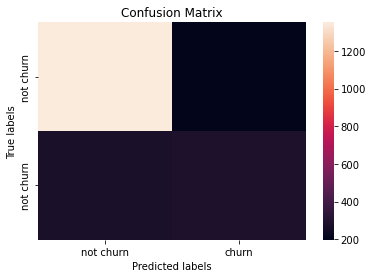

In [27]:
plot_confusion_matrix(y_test, pred)

> Note:
    From the classification results above, we noticed that the precision for the minority value(1) customer churn is having a low precision value(0.59), recall score(0.51) which is a result of an imbalanced dataset(oversampling)
    To increase the precision value and recall score, we'll be using the smoteenn package to help control oversampling using smote
   

In [26]:
sme = SMOTEENN()
X_resampled, y_resampled =  sme.fit_resample(X, y)

In [30]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [31]:
rf_smote = RandomForestClassifier(criterion="gini", n_estimators=15, min_samples_leaf=8)

In [32]:
rf_smote.fit(Xr_train, yr_train)

RandomForestClassifier(min_samples_leaf=8, n_estimators=15)

In [33]:
y_predSmote = rf_smote.predict(Xr_test)
y_predSmote[0:20]

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [48]:
model_score = accuracy_score(yr_test, y_predSmote)
print("Model score : {}%".format(round(model_score *100), 1))

Model score : 96%


In [49]:
results_r = classification_report(yr_test, y_predSmote)
print(results_r)

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       838
           1       0.94      0.96      0.95       550

    accuracy                           0.96      1388
   macro avg       0.96      0.96      0.96      1388
weighted avg       0.96      0.96      0.96      1388



In [89]:
#saving the model
import pickle
filename = 'cc_model.sav'
pickle.dump(rf_smote, open(filename, 'wb'))